In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


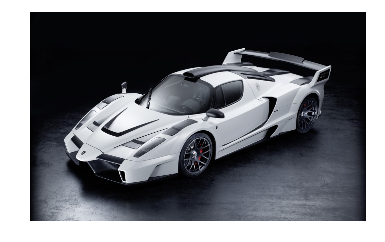

In [3]:
#Load the image
path_to_image = '../tests/images/Gray/gray.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [5]:
#our detection object
det = sr.SalientDetector()

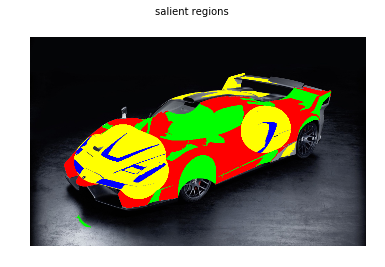

In [7]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
sr.visualize_elements(img, regions=regions);

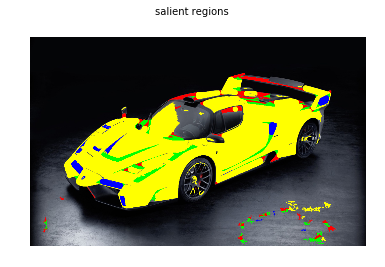

In [11]:
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/images/Gray/gray_dmsra_regions.mat', visualize=False)
regions_dmsra = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
sr.visualize_elements(img, regions_dmsra);